# Inverting log-signatures

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from esig import tosig

import base
import logsig_inversion
from utils.leadlag import leadlag

## Generate path

In [134]:
# Pip size
pip = 0.01

# Number of pips for search space
n_pips = 10

# Number of points
n_points = 21

path = np.r_[0., pip * np.random.randint(-n_pips, n_pips, size=n_points - 1).cumsum()]

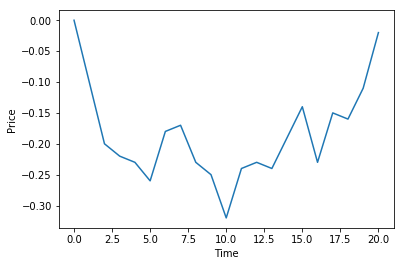

In [135]:
plt.plot(path)
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

In [136]:
# Compute log-signature

order = 4
leadlag_path = leadlag(path)
logsig = tosig.stream2logsig(leadlag_path, order)

print(f"Log-signature: {logsig}")

Log-signature: [-0.02       -0.02       -0.0368      0.00574833  0.00586367 -0.00057181
 -0.00112471 -0.00057419]


## Invert log-signature

In [138]:
n_iterations = 100
n_organisms = 1000
recovered_path, loss = logsig_inversion.train(logsig, order, n_iterations, n_organisms, n_points,
                                              pip, n_pips)

Loss: 0.0013192271315367696: 100%|██████████| 100/100 [00:51<00:00,  1.98it/s]


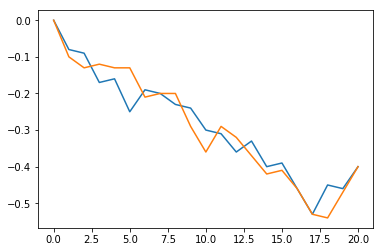

Real log-signature: [-4.00000000e-01 -4.00000000e-01 -2.94000000e-02  2.54866667e-03
  2.93633333e-03 -2.91290000e-04 -5.44110000e-04 -2.67280000e-04]
Recovered log-signature: [-4.00000000e-01 -4.00000000e-01 -2.89000000e-02  2.54716667e-03
  2.91083333e-03 -2.75335000e-04 -5.29024167e-04 -2.66495000e-04]


In [133]:
plt.plot(recovered_path)
plt.plot(path)
plt.show()
print(f"Real log-signature: {logsig}")
print(f"Recovered log-signature: {tosig.stream2logsig(leadlag(recovered_path), order)}")